In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)


C:\Users\deysi\AppData\Local\Temp\ipykernel_28308\1526636886.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)


('2017-08-23',)


In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print(one_year_ago)


2016-08-23


In [10]:
# Perform a query to retrieve the data and precipitation scores
data_rain_scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").all()
print(data_rain_scores)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [11]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names, and drop rows with missing data.
rain_df = pd.DataFrame(data_rain_scores, columns = ["date", "precipitation"]).set_index("date").dropna()

# Sort the dataframe by date
rain_df = rain_df.sort_values (by = "date")
rain_df.head()


,precipitation
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


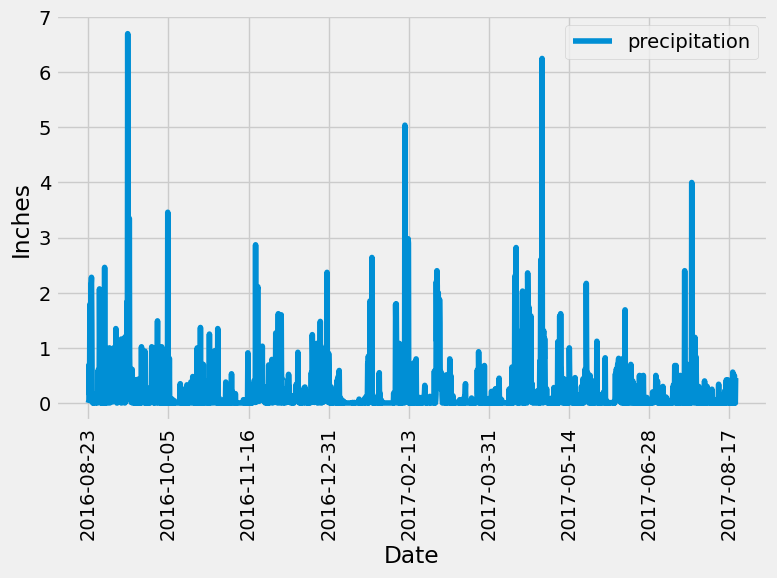

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot (rot = 90, figsize = (8, 6), xlabel = "Date", ylabel = "Inches")
plt.tight_layout()
plt.savefig("Precipitation Analysis")
plt.show()


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(Station).distinct().count()
print(stations_count)

9


In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = (session.query(Measurement.station, func.count(Measurement.station)).\
               group_by(Measurement.station).\
               order_by(func.count(Measurement.station).desc()).all())
most_active


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
#Answer the following question: which station id has the greatest number of observations?
most_active_id = 'USC00519281'
print(f"The most active station ID is: {most_active_id}")

The most active station ID is: USC00519281


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_id_calcs = (
    session.query(func.min(Measurement.tobs), 
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs))
    .filter(Measurement.station == most_active_id).all())
most_active_id_calcs


[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observation = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").\
    filter(Measurement.station == most_active_id).all()
print(temp_observation)


[('2016-08-23', 77.0), ('2016-08-24', 77.0), ('2016-08-25', 80.0), ('2016-08-26', 80.0), ('2016-08-27', 75.0), ('2016-08-28', 73.0), ('2016-08-29', 78.0), ('2016-08-30', 77.0), ('2016-08-31', 78.0), ('2016-09-01', 80.0), ('2016-09-02', 80.0), ('2016-09-03', 78.0), ('2016-09-04', 78.0), ('2016-09-05', 78.0), ('2016-09-06', 73.0), ('2016-09-07', 74.0), ('2016-09-08', 80.0), ('2016-09-09', 79.0), ('2016-09-10', 77.0), ('2016-09-11', 80.0), ('2016-09-12', 76.0), ('2016-09-13', 79.0), ('2016-09-14', 75.0), ('2016-09-15', 79.0), ('2016-09-16', 78.0), ('2016-09-17', 79.0), ('2016-09-18', 78.0), ('2016-09-19', 78.0), ('2016-09-20', 76.0), ('2016-09-21', 74.0), ('2016-09-22', 77.0), ('2016-09-23', 78.0), ('2016-09-24', 79.0), ('2016-09-25', 79.0), ('2016-09-26', 77.0), ('2016-09-27', 80.0), ('2016-09-28', 78.0), ('2016-09-29', 78.0), ('2016-09-30', 78.0), ('2016-10-01', 77.0), ('2016-10-02', 79.0), ('2016-10-03', 79.0), ('2016-10-04', 79.0), ('2016-10-05', 79.0), ('2016-10-06', 75.0), ('2016-10

In [19]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names, and drop rows with missing data.
temp_df = pd.DataFrame(temp_observation, columns = ["date", "temperature"]).set_index("date").dropna()

# Sort the dataframe by date
temp_df = temp_df.sort_values (by = "date")
temp_df.head()


,temperature
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


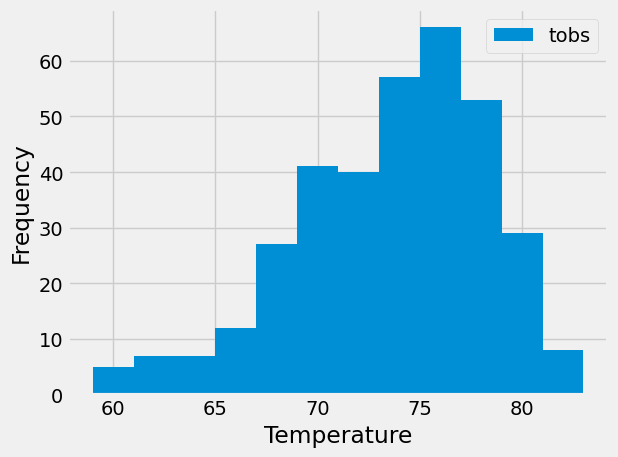

In [20]:
plt.hist(temp_df['temperature'],bins = 12, density = False, label = "tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend ()
plt.figsize = (8, 6)
plt.tight_layout()
plt.savefig("Temperature Analysis")
plt.show()

# Close Session

In [21]:
# Close Session
session.close()